In [1]:
import pandas as pd

In [2]:
bank_data = pd.read_csv('datasets/bank_data_processed.csv')

bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
1,2,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
2,3,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
3,4,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
4,5,42,18,141,94114,3,5.0,3,0,1,1,1,1,0


In [3]:
X = bank_data.drop('CreditCard', axis=1)

Y = bank_data['CreditCard']

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### Random Forest Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
rnd_clf = RandomForestClassifier(n_estimators = 400,
                                 max_leaf_nodes = 16,
                                 n_jobs = -1)

rnd_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [7]:
y_pred = rnd_clf.predict(x_test)

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8333333333333334

In [9]:
important_features = pd.Series(rnd_clf.feature_importances_, index=X.columns).\
                        sort_values(ascending=False)

important_features

CD Account            0.362652
ZIP Code              0.111771
ID                    0.087326
Income                0.069235
Experience            0.066387
Age                   0.064249
CCAvg                 0.063748
Securities Account    0.052534
Online                0.052449
Mortgage              0.035385
Family                0.017575
Education             0.016689
Personal Loan         0.000000
dtype: float64

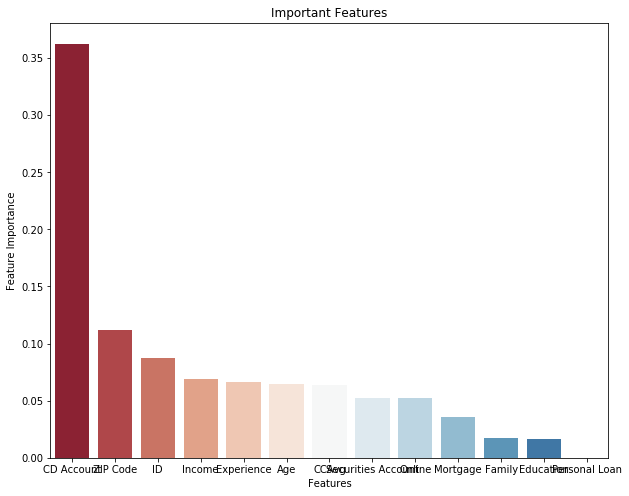

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot( x = important_features.index, y = important_features, palette = "RdBu")

plt.xlabel('Features')
plt.ylabel('Feature Importance')

plt.title("Important Features")
plt.show()

#### BaggingClassifier + DecisionTreeClassifier(with splitter='random') = RandomForestClassifier

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter ='random', max_leaf_nodes=12), 
                                                   n_estimators = 400, 
                                                   max_samples = 1.0,
                                                   bootstrap = True,
                                                   n_jobs = -1)

bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=12,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
  

In [13]:
y_pred = bag_clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.8541666666666666

### ExtraTreesClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html    
Extra-Tree Classifier is growing tree even more random by using random thresholds for each features rather than searching for best possible thresholds(like regular decision tree).

In [14]:
from sklearn.ensemble import ExtraTreesClassifier

In [15]:
extra_clf = ExtraTreesClassifier(n_estimators = 600,
                                 max_leaf_nodes = 16,
                                 n_jobs = -1)

extra_clf.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=16, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [16]:
y_pred = extra_clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.8333333333333334